<a href="https://colab.research.google.com/github/manish34048/The-Sparks-Foundation/blob/Task-1/Task1%3A-%20Prediction%20using%20supervised%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Name- Manish Raj**
**1.** **Task to be done:** **Predict the percentage of marks of an student based on the number of study hour.**

**Q-** **What will be the predicted score if a student studies for 9.25 hours/day?**
# **Import the libraries:-**

In [74]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [29]:
# Reading data from remote link
url = "http://bit.ly/w-data"
read = pd.read_csv(url)
print("Data imported successfully")
read.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [ ]:
##I used describe method so that it will display percent,mean,max,std,count of the given elements

In [30]:
read.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


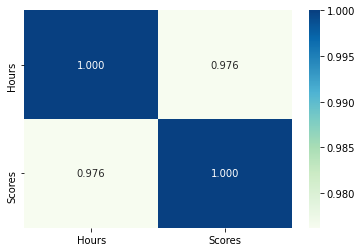

In [31]:
import seaborn as sns
sns.heatmap(read.corr(),annot=True,fmt='.3f',cmap='GnBu')

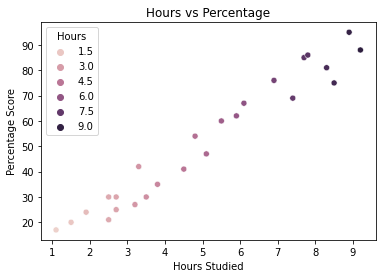

In [41]:
# Plotting the distribution of scores
sns.scatterplot(x='Hours', y='Scores',data=read,hue='Hours')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [46]:
x = np.array(read[['Hours']])
y = np.array(read[['Scores']])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(f"size of train and test data is {x_train.size,x_test.size,y_train.size,y_test.size}")

size of train and test data is (20, 5, 20, 5)


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

# **Train the model:-**

In [49]:
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
m=model.coef_

where m is gradient ,c is intercept on y axis,x and y are continuous variables

In [50]:
print(f'Value of m is {m[0][0]}')
c=model.intercept_
print(f'value of c is {c[0]}')

Value of m is 9.91065648064224
value of c is 2.018160041434662


# Plot the training Data
After training data we are going to plot the data

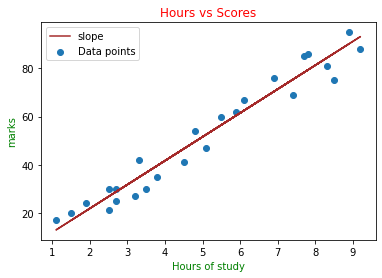

In [63]:
line=model.coef_*x + model.intercept_
plt.scatter(x,y,label='Data points')
plt.plot(x,line,color='brown', label='slope')
plt.title('Hours vs Scores',color='r')
plt.xlabel('Hours of study',color='g',)
plt.ylabel('marks',color='g')
plt.legend()
plt.show()

### Lets test the data

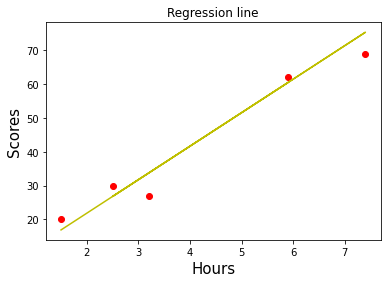

In [68]:
y_pred=model.predict(x_test)
plt.plot(x_test,y_pred,color='y')
plt.scatter(x_test,y_test,color='r')
plt.xlabel('Hours',fontsize=10)
plt.ylabel('Scores',fontsize=10)
plt.title('Regression line')
plt.show()

### compare the Actual and Predicted scores

In [69]:
test1=list(y_test)
prediction=list(y_pred)
df_compare = pd.DataFrame({ 'Actual':test1,'Result':prediction})
df_compare

,Actual,Result
0,[20],[16.884144762398023]
1,[27],[33.732260779489835]
2,[69],[75.35701799818725]
3,[30],[26.79480124304026]
4,[62],[60.491033277223885]


In [72]:
#accuracy
metrics.r2_score(y_test,y_pred)

0.9454906892105354

In [75]:
r_square=model.score(x_train,y_train)
print(f'Value of R squared value is{r_square}')
#we will also calculate mean absolute error
mean_absolute_error=mean_absolute_error(y_test,predict)
print(f'value of mean absolute error is{mean_absolute_error}')

Value of R squared value is0.9515510725211553
value of mean absolute error is4.183859899002982


## **Final prediction of Score:-**

In [79]:
hours=9.25
my_predict=model.predict([[hours]])
print(f"Hours = {hours}/day")
print(f"Predicted marks = {my_predict[0][0]}")

Hours = 9.25/day
Predicted marks = 93.69173248737539


In conclusion we can say that if a student studies for 9.25 hours a day then he can score 93.6917